In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Sensitivity of cchem parameterspace to temperature, salinity, DIC, TA, nut. 
 
    PLOT omega, pH for : 
        TA=DIC=2000 at T = 5-25, S = 0 - 35
        


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
import mocsy
import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import reload
plt.style.use('ggplot')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

In [4]:
xdim = 30
ydim = 30
TA = np.zeros([ydim,xdim])
DIC = np.zeros([ydim,xdim])

S = np.zeros_like(DIC)
T = np.zeros_like(DIC)
P = np.zeros_like(DIC)
S[:] = 30
T[:] = 10
P[:] = 1

topDIC = 2500
lowDIC = 1000

topTA = 2500
lowTA = 1000

step = (topDIC-lowDIC)/ydim
print(step)

for i in range(0,ydim):
    DIC[i,:] = lowDIC + (topDIC-lowDIC)/ydim *(i)
for i in range(0,xdim):
    TA[:,i] = lowTA + (topTA-lowTA)/ydim *(i)

# print(DIC)
# print(TA)


Sr = np.ravel(S)
Tr = np.ravel(T)  
Pr = np.ravel(P)  
DICr = np.ravel(DIC) * 1e-3
TAr = np.ravel(TA) * 1e-3

zero = DICr *0

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=Pr, depth=zero, lat=zero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

pHr = pH.reshape(xdim,ydim)
OmegaAr = OmegaA.reshape(xdim,ydim) 
pco2r = pco2.reshape(xdim,ydim) 

# print('*OMA*')
# print(OmegaA)

50.0


AttributeError: module 'cmocean.cm' has no attribute 'tarn'

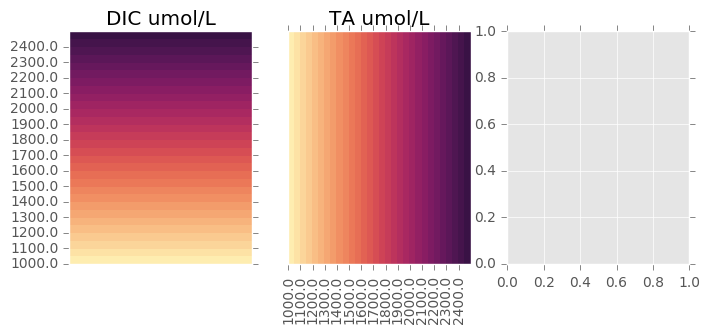

In [5]:
fact = 2
fig = plt.figure(figsize=(8,3))
nop = 3
for i in range(1,nop+1):
    ax = fig.add_subplot(1,nop,i)

    if i == 1:
        v_min = lowDIC
        v_max = topDIC
        
        tplt = DIC
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=v_min, vmax=v_max)

        major_ySP = np.arange(0, ydim, (1 * fact))
        y_labSP = np.arange(lowDIC, topDIC, (step* fact))
        ax.set_yticks(major_ySP)
        ax.set_yticklabels(y_labSP) 
        ax.set_xticklabels([])
        ax.set_xticks([])
        plt.title('DIC umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
#         major_xSP = np.arange(0, xdim, 1)


    
    if i == 2:
        v_min = lowTA
        v_max = topTA
        tplt = TA
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=v_min, vmax=v_max)
        
        major_xSP = np.arange(0, xdim, (1 * fact))
        x_labSP = np.arange(v_min, v_max, (step* fact))
        ax.set_xticks(major_xSP)
        ax.set_xticklabels(x_labSP,rotation='vertical') 
        ax.set_yticklabels([])
        ax.set_yticks([])
        plt.title('TA umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
#         major_xSP = np.arange(0, xdim, 1)
        
    if i == 3:
        v_min = 0
        v_max = 2
        tplt = OmegaAr
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.curl, vmin=v_min, vmax=v_max)
        cbar = fig.colorbar(mesh, ax=ax)
        major_xSP = np.arange(0, xdim, (1 * fact))
        x_labSP = np.arange(lowTA, topTA, (step* fact))
        ax.set_xticks(major_xSP)
        ax.set_xticklabels(x_labSP,rotation='vertical') 
        
        major_ySP = np.arange(0, ydim, (1 * fact))
        y_labSP = np.arange(lowDIC, topDIC, (step* fact))
        ax.set_yticks(major_ySP)
        ax.set_yticklabels(y_labSP)
        ax.set_ylabel('DIC umol/L')
        ax.set_xlabel('TA umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
        plt.title('Omega A')
            
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
fact = 2
tf = 0.9
fig = plt.figure(figsize=(8.7*tf,8*tf))
nop = 1
for i in range(1,nop+1):
    ax = fig.add_subplot(1,nop,i)

        
    if i == 1:
        v_min = 0
        v_max = 2
        tplt = OmegaAr
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.curl, vmin=v_min, vmax=v_max)
        cbar = fig.colorbar(mesh, ax=ax)
        cbar.set_label('Omega A')
        major_xSP = np.arange(0, xdim, (1 * fact))
        x_labSP = np.arange(lowTA, topTA, (step* fact))
        ax.set_xticks(major_xSP)
        ax.set_xticklabels(x_labSP,rotation='vertical') 
        
        major_ySP = np.arange(0, ydim, (1 * fact))
        y_labSP = np.arange(lowDIC, topDIC, (step* fact))
        ax.set_yticks(major_ySP)
        ax.set_yticklabels(y_labSP)
        ax.set_ylabel('DIC umol/L')
        ax.set_xlabel('TA umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
        plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu')

            
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
fact = 2
tf = 0.9
fig = plt.figure(figsize=(8.7*tf,8*tf))
nop = 1
for i in range(1,nop+1):
    ax = fig.add_subplot(1,nop,i)

        
    if i == 1:
        v_min = 0
        v_max = 800
        tplt = pco2r
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.curl, vmin=v_min, vmax=v_max)
        cbar = fig.colorbar(mesh, ax=ax)
        cbar.set_label('pCO2')
        major_xSP = np.arange(0, xdim, (1 * fact))
        x_labSP = np.arange(lowTA, topTA, (step* fact))
        ax.set_xticks(major_xSP)
        ax.set_xticklabels(x_labSP,rotation='vertical') 
        
        major_ySP = np.arange(0, ydim, (1 * fact))
        y_labSP = np.arange(lowDIC, topDIC, (step* fact))
        ax.set_yticks(major_ySP)
        ax.set_yticklabels(y_labSP)
        ax.set_ylabel('DIC umol/L')
        ax.set_xlabel('TA umol/L')
        ax.set_xlim([0,xdim])
        ax.set_ylim([0,ydim])
        plt.title('Temp.: '+ str(int(T[0,0])) + ' C, Sal.: '+str(int(S[0,0])) + ' psu')

            
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
Tr = 10
Sr = 25
TAr = 2300 * 1e-3
DICr = 1800 * 1e-3
zero = 0 

response_tup = mocsy.mvars(temp=Tr, sal=Sr, alk=TAr, dic=DICr, 
                   sil=zero, phos=zero, patm=zero, depth=zero, lat=zero, 
                    optcon='mol/m3', optt='Tinsitu', optp='m',
                    optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

print(pH)
print(pco2)
print(OmegaA)

In [ ]:
x = np.random.randint(low=0,high=100,size=(5,5) )
print(x)

In [ ]:
v_min = 0
v_max = 100
fig = plt.figure(figsize=(8,3))
nop = 3
for i in range(1,nop+1):
    ax = fig.add_subplot(1,nop,i)

    if i == 1:
        tplt = x
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=v_min, vmax=v_max)

    
    if i == 2:
        tplt = x
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=v_min, vmax=v_max)

    if i == 3:
        tplt = x
        mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=v_min, vmax=v_max)


            
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()